In [1]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import os
import glob
import re
from nltk.stem.wordnet import WordNetLemmatizer
import seaborn as sns
import pandas as pd

#nltk.download('wordnet')

In [2]:
# Some Control Variables 
in_folder = r'input/'
outlder = r'output/'

CWD = r'/home/cat/Tuli/Keyword Visualizer/'
stop_words =set(stopwords.words('english'))

# Adding of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

TOP_N = 30

In [3]:
def get_txt_filenames(source):
    os.chdir(source)
    files =[source + file for file in glob.glob("*.txt")]
    os.chdir(CWD)
    return files

def get_contents(filename):
    with open(filename, 'rb') as f:
        return str(f.read())
    
# create a custom clean for Math subject ----> TODO
def clean(data):
    text = re.sub('[^a-zA-Z]', ' ', data)
    text = text.lower()
    text = text.split()
    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    
    return text
    


In [4]:
input_files = get_txt_filenames(in_folder)

In [5]:
input_files

['input/BIOL265_REF_11062018_cleaned.txt',
 'input/BIOL265_REF_10112018_cleaned.txt',
 'input/BIOL265_CF_10252018_REF_cleaned.txt']

In [6]:
input_content = [get_contents(file)[2:-1] for file in input_files]

In [7]:
len(input_content)

3

In [8]:
input_content[0]

"there we go forgot to push a button happens come on there we go so when we're looking at this kind of design some of you may have used morphologybased trees without really knowing it before have any of you actually used flower guides or field guides or anything like that in ecology or field studies or anything before not really at home just for fun field guide field guide yeah for what birds flowers insects yeah those are kind of the standards right my dad is super proud of his green audubon bird book that he has to like break out and show me the newest birds they found in their yard and i'm like that's great that's great terrific dad but we see them laid out in a very similar way to our basic morphology kinds of directions where we're looking for shapes sizes colors right that don't give us a ton of background information we're kind of inferring genotypes from it right so we look at with flower guides it always kind of starts well most of them now start with color which is hard for f

In [9]:
input_content = [clean(text) for text in input_content]

In [10]:
all_data = " ".join(input_content)

In [11]:
len(all_data), len(all_data.split())

(81400, 11837)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(input_content)

In [13]:
list(cv.vocabulary_.keys())[:10]

['push',
 'happens',
 'morphologybased',
 'flower',
 'guide',
 'field',
 'bird',
 'standard',
 'dad',
 'proud']

[Text(0, 0, 'right'),
 Text(0, 0, 'kind'),
 Text(0, 0, 'looking'),
 Text(0, 0, 'look'),
 Text(0, 0, 'thing'),
 Text(0, 0, 'like'),
 Text(0, 0, 'actually'),
 Text(0, 0, 'gene'),
 Text(0, 0, 'genome'),
 Text(0, 0, 'get'),
 Text(0, 0, 'would'),
 Text(0, 0, 'okay'),
 Text(0, 0, 'sort'),
 Text(0, 0, 'yeah'),
 Text(0, 0, 'going'),
 Text(0, 0, 'really'),
 Text(0, 0, 'see'),
 Text(0, 0, 'different'),
 Text(0, 0, 'little'),
 Text(0, 0, 'lot')]

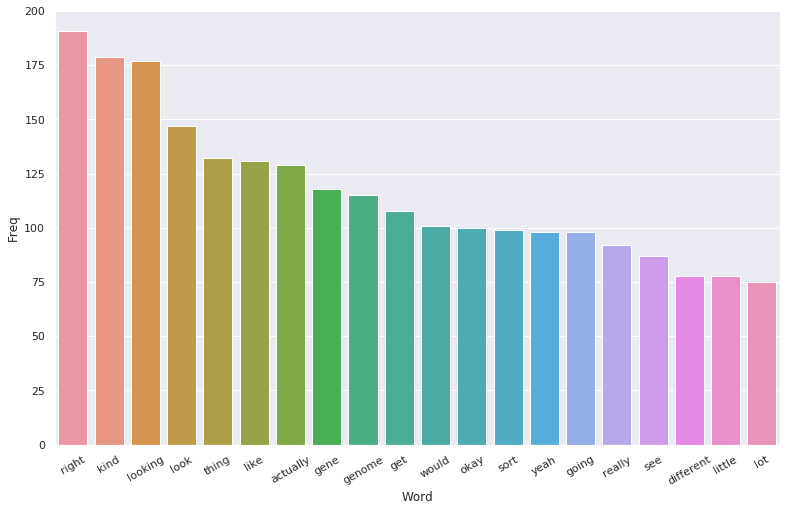

In [14]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(input_content, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

            Bi-gram  Freq
0        thing like    31
1       genome size    30
2        little bit    21
3         fruit fly    20
4    protein coding    17
5       coding gene    17
6        sort thing    15
7         gene flow    14
8         yeah yeah    14
9      looking kind    13
10        base pair    13
11  sandra connelly    12
12          yep yep    11
13  digestive tract    11
14       right look    10
15       kind thing    10
16    right looking    10
17        cell size    10
18    gene transfer    10
19     audience mic    10


[Text(0, 0, 'thing like'),
 Text(0, 0, 'genome size'),
 Text(0, 0, 'little bit'),
 Text(0, 0, 'fruit fly'),
 Text(0, 0, 'protein coding'),
 Text(0, 0, 'coding gene'),
 Text(0, 0, 'sort thing'),
 Text(0, 0, 'gene flow'),
 Text(0, 0, 'yeah yeah'),
 Text(0, 0, 'looking kind'),
 Text(0, 0, 'base pair'),
 Text(0, 0, 'sandra connelly'),
 Text(0, 0, 'yep yep'),
 Text(0, 0, 'digestive tract'),
 Text(0, 0, 'right look'),
 Text(0, 0, 'kind thing'),
 Text(0, 0, 'right looking'),
 Text(0, 0, 'cell size'),
 Text(0, 0, 'gene transfer'),
 Text(0, 0, 'audience mic')]

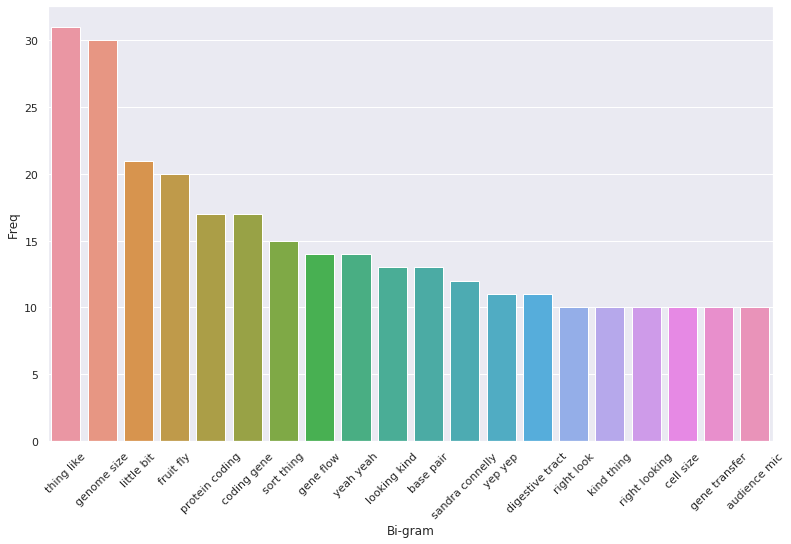

In [15]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(input_content, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                       Tri-gram  Freq
0           protein coding gene    14
1           audience mic sandra    10
2           mic sandra connelly    10
3      horizontal gene transfer     9
4             neural crest cell     7
5                yeah yeah yeah     6
6         number protein coding     6
7               look thing like     6
8               couple week ago     5
9   phylogenetic specie concept     4
10                  yep yep yep     4
11       kentucky fried chicken     4
12           thing like looking     3
13       shift allele frequency     3
14        maintaining gene flow     3
15            right right right     3
16                 yep yep yeah     3
17             genome size okay     3
18           impact genome size     3
19           change genome size     3


[Text(0, 0, 'protein coding gene'),
 Text(0, 0, 'audience mic sandra'),
 Text(0, 0, 'mic sandra connelly'),
 Text(0, 0, 'horizontal gene transfer'),
 Text(0, 0, 'neural crest cell'),
 Text(0, 0, 'yeah yeah yeah'),
 Text(0, 0, 'number protein coding'),
 Text(0, 0, 'look thing like'),
 Text(0, 0, 'couple week ago'),
 Text(0, 0, 'phylogenetic specie concept'),
 Text(0, 0, 'yep yep yep'),
 Text(0, 0, 'kentucky fried chicken'),
 Text(0, 0, 'thing like looking'),
 Text(0, 0, 'shift allele frequency'),
 Text(0, 0, 'maintaining gene flow'),
 Text(0, 0, 'right right right'),
 Text(0, 0, 'yep yep yeah'),
 Text(0, 0, 'genome size okay'),
 Text(0, 0, 'impact genome size'),
 Text(0, 0, 'change genome size')]

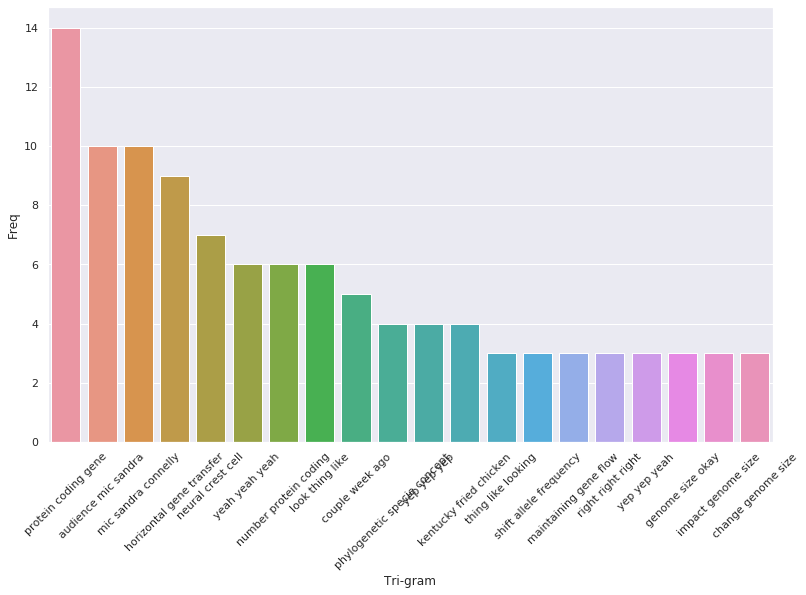

In [16]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(input_content, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc= input_content[0]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [18]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,50)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
go forgot push button happens come go looking kind design may used morphologybased tree without really knowing actually used flower guide field guide anything like ecology field study anything really home fun field guide field guide yeah bird flower insect yeah kind standard right dad super proud green audubon bird book like break newest bird found yard like great great terrific dad see laid similar way basic morphology kind direction looking shape size color right give u ton background information kind inferring genotype right look flower guide always kind start well start color hard folk colorblind look breaking start flower position kind give sort direction yeah typically color looking grouping flower kind give sense going may used something like like dichotomous key sort thing common aquatic field guide basically bug eight leg six leg go next page tell kind follow right wing wing wing click wing click electronic actually lot really nice online field guide apps phone ever

In [19]:
import sys
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from wordcloud import WordCloud
# nltk.download('punkt')

In [20]:
stemmed_corpus = [word_tokenize(data) for data in input_content]

dictionary = Dictionary(stemmed_corpus) # Build the dictionary

In [21]:
# Convert to vector corpus

vectors = [dictionary.doc2bow(text) for text in stemmed_corpus]

# Build TF-IDF model

tfidf = TfidfModel(vectors)

In [22]:
# Get TF-IDF weights

weights = tfidf[vectors[0]]

In [23]:
# Get terms from the dictionary and pair with weights

weights = { dictionary[pair[0]] : pair[1] for pair in weights}
print(weights)

{'able': 0.022346461931115284, 'abominable': 0.045410993193084226, 'absolutely': 0.015136997731028074, 'access': 0.005586615482778821, 'account': 0.015136997731028074, 'acid': 0.016759846448336464, 'acronym': 0.015136997731028074, 'across': 0.03910630837945175, 'adventure': 0.03027399546205615, 'aerodynamic': 0.015136997731028074, 'algae': 0.022346461931115284, 'allele': 0.016759846448336464, 'allopatric': 0.09082198638616845, 'allowing': 0.03027399546205615, 'allozymes': 0.045410993193084226, 'amazon': 0.015136997731028074, 'america': 0.045410993193084226, 'amino': 0.016759846448336464, 'among': 0.015136997731028074, 'analysis': 0.015136997731028074, 'ancestor': 0.005586615482778821, 'angle': 0.015136997731028074, 'answer': 0.03910630837945175, 'answered': 0.015136997731028074, 'antenna': 0.005586615482778821, 'apoyo': 0.03027399546205615, 'appearance': 0.015136997731028074, 'apple': 0.21191796823439304, 'apply': 0.015136997731028074, 'apps': 0.015136997731028074, 'aquatic': 0.0151369

In [24]:
# Initialize the word cloud

wc = WordCloud(
    background_color="white",
    max_words=2000,
    width = 1024,
    height = 720,
    stopwords=stopwords.words("english")
)


In [25]:
# Generate the cloud

wc.generate_from_frequencies(weights)

# Save the could to a file

wc.to_file("word_cloud.png")

TypeError: cannot unpack non-iterable int object